In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, kstest, pearsonr
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train_V2.csv')
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,9e5fbba13ebe19,1c200aab6dad9b,92db29f073548e,0,0,80.80,0,0,0,58,...,1,0.0000,0,0.00,1,0,1135.00,2,1653,0.4643
1048571,1928469d37a196,e541681c9bf27e,c6e91c362490b8,0,3,184.60,0,0,2,27,...,0,995.0000,0,0.00,0,0,2324.00,9,0,0.9381
1048572,5b2b9abc0f64c2,2161ff6847bf15,beedba7c361349,0,4,181.50,1,0,1,20,...,0,1395.0000,0,0.00,0,0,2153.00,4,1461,0.8400
1048573,91c7c010d76ffd,76cc253f07943d,a7d9c6edf0121f,0,0,100.00,1,1,0,42,...,0,0.0000,0,0.00,0,0,81.39,3,0,0.0370


In [ ]:
df = df[df["matchType"]== "duo"]
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0,0,0.000,0,0,161.8,2,0,0.7755
23,0b6fbdfb59c994,7a75c3e86934f6,8b0a78c005cea0,0,6,1011.00,6,2,2,2,...,0,4860.0,0,0.000,0,0,2727.0,7,1603,0.9592
29,ac5b57ff39979c,857cc55b2b6001,e019e04dee4f19,0,0,0.00,0,0,0,87,...,0,0.0,0,0.000,0,0,0.0,0,0,0.0000
30,3a4e362d28f411,b4fbf11bf33ac3,cf3d655571b26b,0,0,36.73,0,0,0,62,...,0,0.0,0,0.000,0,0,455.5,5,0,0.4255
32,e050d1f179d289,9e9fc09bcdab3f,bf3065e01dd3f9,0,3,0.00,0,0,1,61,...,0,1154.0,0,0.000,1,0,1240.0,7,0,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048505,dd0792c2382d3f,1da0e49262bd7e,8c6fcff081e32f,0,0,136.60,1,0,0,20,...,0,0.0,0,0.000,0,0,815.6,3,0,0.4091
1048522,5912758f70b054,e34e05ecf8f138,c153643b42fa17,0,1,157.40,0,1,1,27,...,0,206.4,0,2.497,0,0,2027.0,5,0,0.7021
1048534,3d7082ddde5489,c43d939cc5bc80,b1b2ce6da85806,0,0,0.00,0,0,0,64,...,0,0.0,0,0.000,0,0,509.6,2,0,0.3333
1048540,2f3d1cc6e1eaaf,44f4723622b98d,9d4dc128fb6130,0,3,27.31,0,0,0,60,...,0,3541.0,0,0.000,0,0,819.5,4,1640,0.5000


In [ ]:
df = df.reset_index()
df

,index,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,...,0,0.0,0,0.000,0,0,161.8,2,0,0.7755
1,23,0b6fbdfb59c994,7a75c3e86934f6,8b0a78c005cea0,0,6,1011.00,6,2,2,...,0,4860.0,0,0.000,0,0,2727.0,7,1603,0.9592
2,29,ac5b57ff39979c,857cc55b2b6001,e019e04dee4f19,0,0,0.00,0,0,0,...,0,0.0,0,0.000,0,0,0.0,0,0,0.0000
3,30,3a4e362d28f411,b4fbf11bf33ac3,cf3d655571b26b,0,0,36.73,0,0,0,...,0,0.0,0,0.000,0,0,455.5,5,0,0.4255
4,32,e050d1f179d289,9e9fc09bcdab3f,bf3065e01dd3f9,0,3,0.00,0,0,1,...,0,1154.0,0,0.000,1,0,1240.0,7,0,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73506,1048505,dd0792c2382d3f,1da0e49262bd7e,8c6fcff081e32f,0,0,136.60,1,0,0,...,0,0.0,0,0.000,0,0,815.6,3,0,0.4091
73507,1048522,5912758f70b054,e34e05ecf8f138,c153643b42fa17,0,1,157.40,0,1,1,...,0,206.4,0,2.497,0,0,2027.0,5,0,0.7021
73508,1048534,3d7082ddde5489,c43d939cc5bc80,b1b2ce6da85806,0,0,0.00,0,0,0,...,0,0.0,0,0.000,0,0,509.6,2,0,0.3333
73509,1048540,2f3d1cc6e1eaaf,44f4723622b98d,9d4dc128fb6130,0,3,27.31,0,0,0,...,0,3541.0,0,0.000,0,0,819.5,4,1640,0.5000


In [ ]:
df.drop(["index"], axis = 1, inplace=True)
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0,0,0.000,0,0,161.8,2,0,0.7755
1,0b6fbdfb59c994,7a75c3e86934f6,8b0a78c005cea0,0,6,1011.00,6,2,2,2,...,0,4860.0,0,0.000,0,0,2727.0,7,1603,0.9592
2,ac5b57ff39979c,857cc55b2b6001,e019e04dee4f19,0,0,0.00,0,0,0,87,...,0,0.0,0,0.000,0,0,0.0,0,0,0.0000
3,3a4e362d28f411,b4fbf11bf33ac3,cf3d655571b26b,0,0,36.73,0,0,0,62,...,0,0.0,0,0.000,0,0,455.5,5,0,0.4255
4,e050d1f179d289,9e9fc09bcdab3f,bf3065e01dd3f9,0,3,0.00,0,0,1,61,...,0,1154.0,0,0.000,1,0,1240.0,7,0,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73506,dd0792c2382d3f,1da0e49262bd7e,8c6fcff081e32f,0,0,136.60,1,0,0,20,...,0,0.0,0,0.000,0,0,815.6,3,0,0.4091
73507,5912758f70b054,e34e05ecf8f138,c153643b42fa17,0,1,157.40,0,1,1,27,...,0,206.4,0,2.497,0,0,2027.0,5,0,0.7021
73508,3d7082ddde5489,c43d939cc5bc80,b1b2ce6da85806,0,0,0.00,0,0,0,64,...,0,0.0,0,0.000,0,0,509.6,2,0,0.3333
73509,2f3d1cc6e1eaaf,44f4723622b98d,9d4dc128fb6130,0,3,27.31,0,0,0,60,...,0,3541.0,0,0.000,0,0,819.5,4,1640,0.5000


In [ ]:
df = df.drop(['Id','groupId','matchId','matchType','maxPlace','killPoints','winPoints','rankPoints'], axis = 1)

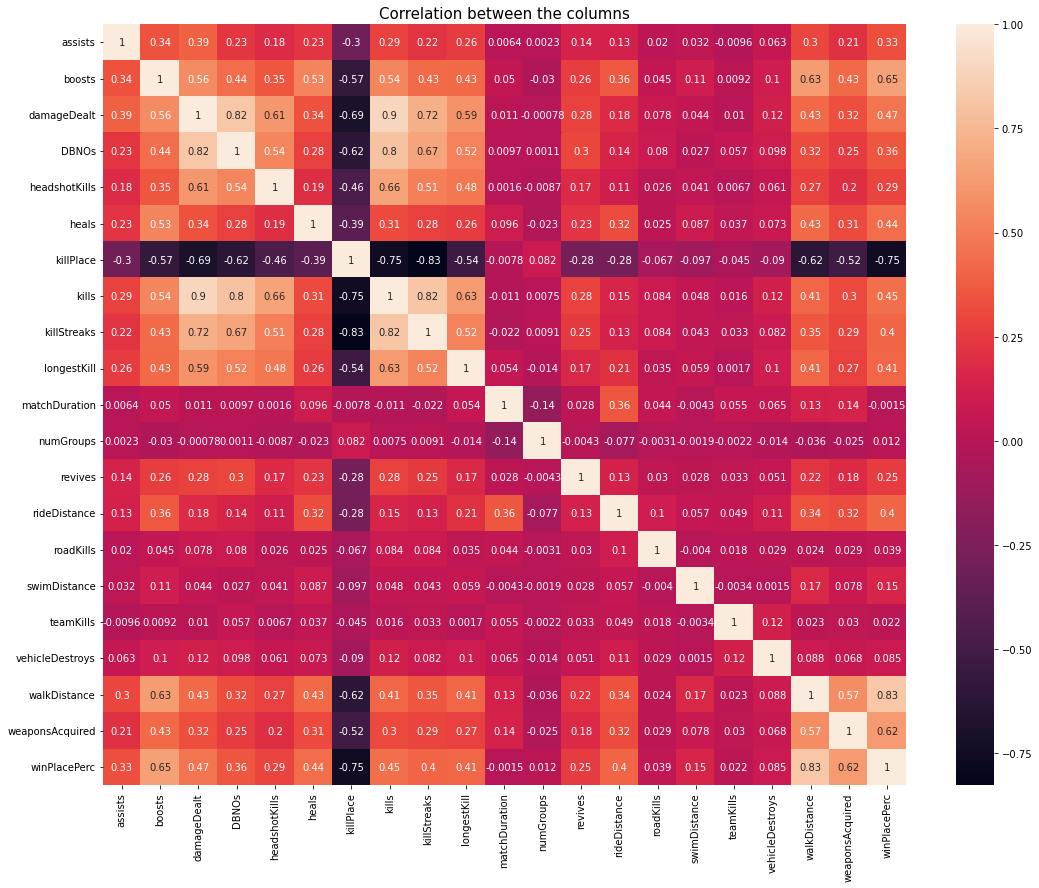

In [ ]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns', fontsize = 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


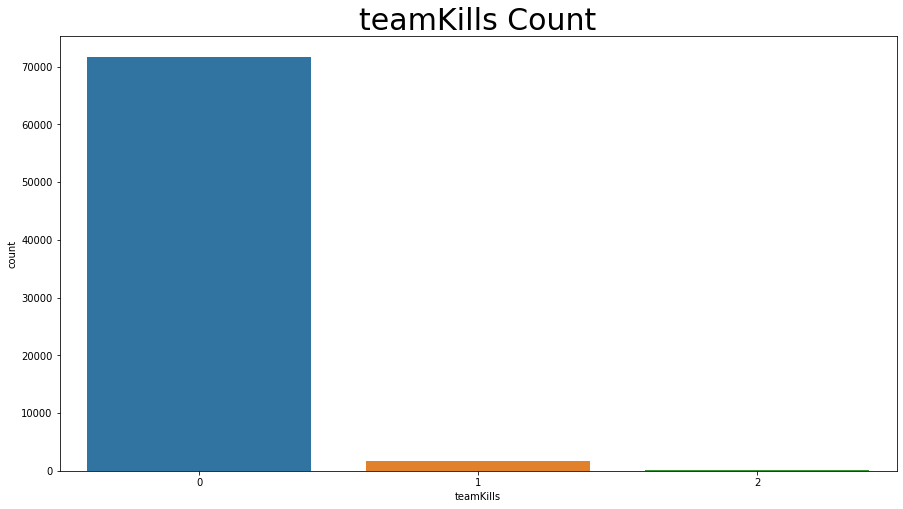

In [ ]:
data = df.copy()
#data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,8))
sns.countplot(data['teamKills'].astype(str).sort_values())
plt.title("teamKills Count", fontsize=30)
plt.show()

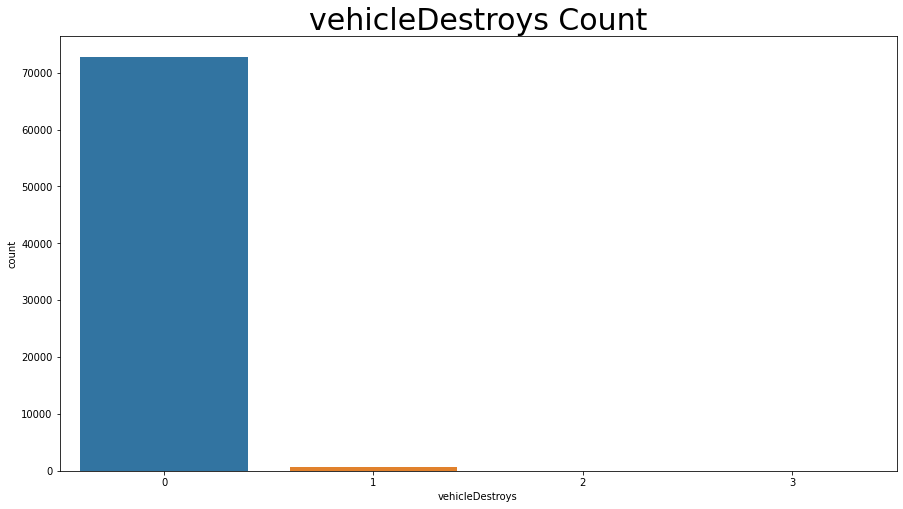

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='vehicleDestroys', data=df, order = df['vehicleDestroys'].value_counts().index)
#ax.set_xticklabels(new_list,rotation=60)
ax.set_title("vehicleDestroys Count", fontsize = 30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


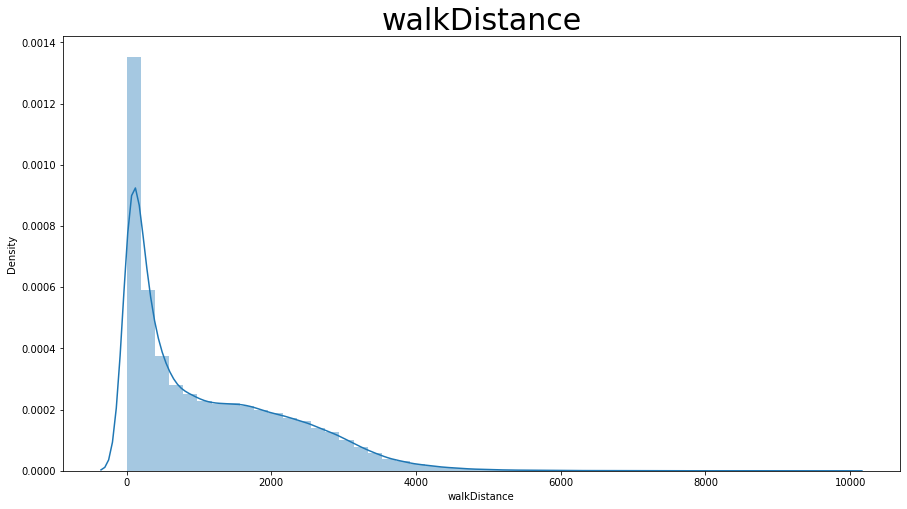

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.distplot(df["walkDistance"])
ax.set_title("walkDistance", fontsize = 30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


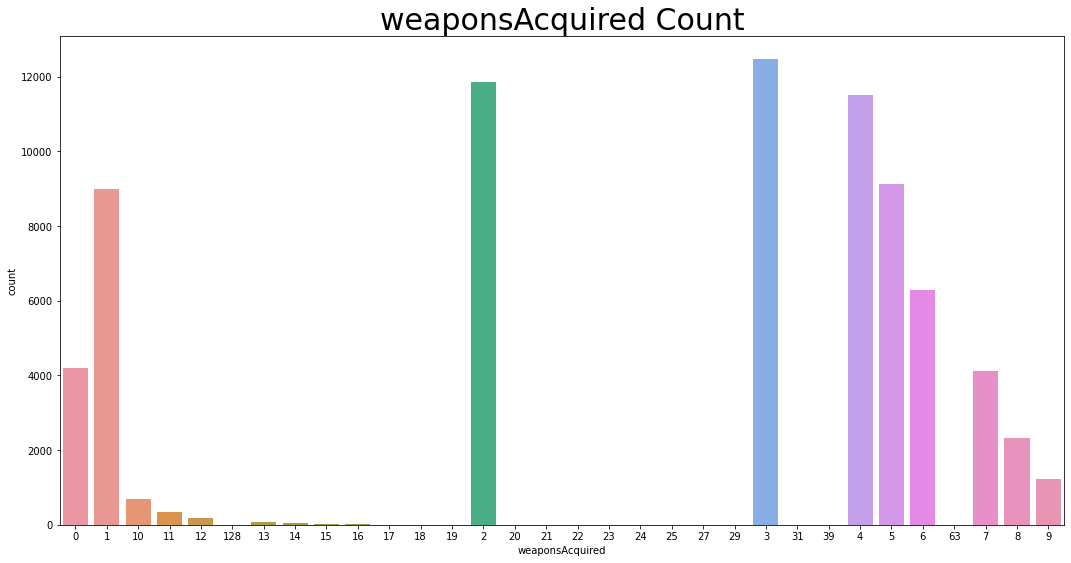

In [ ]:
data = df.copy()
#data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(18,9))
sns.countplot(data['weaponsAcquired'].astype(str).sort_values())
plt.title("weaponsAcquired Count", fontsize=30)
plt.show()

**PCA**

In [ ]:
df_inputs = df.drop(['winPlacePerc'],axis = 1) # 타겟 값을 제외한 피쳐만 추출
df_scaled = StandardScaler().fit_transform(df_inputs)
df_scale_DF = pd.DataFrame(df_scaled)
#df_scale_DF['target'] = df.winPlacePerc
df_scale_DF.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7.351100e+04,7.351100e+04,7.351100e+04,7.351100e+04,7.351100e+04,7.351100e+04,7.351100e+04,7.351100e+04,7.351100e+04,7.351100e+04,7.351100e+04,7.351100e+04,7.351100e+04,7.351100e+04,7.351100e+04,7.351100e+04,7.351100e+04,7.351100e+04,7.351100e+04,7.351100e+04
mean,4.222576e-15,1.978507e-15,1.306922e-16,-4.161671e-16,-1.535879e-15,-7.434965e-16,-4.768200e-16,1.183115e-15,-7.687937e-16,1.130399e-15,-1.373178e-16,-9.224996e-16,-1.079700e-17,-3.836372e-16,4.446525e-15,-2.678089e-15,3.554475e-15,-4.286105e-15,7.235003e-17,3.408388e-16
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-4.001297e-01,-6.400543e-01,-7.558228e-01,-6.344884e-01,-3.651917e-01,-5.042108e-01,-1.701937e+00,-5.988419e-01,-7.627439e-01,-4.406166e-01,-1.812401e+00,-9.678978e+00,-3.372583e-01,-4.587137e-01,-5.531152e-02,-1.520570e-01,-1.538696e-01,-9.541515e-02,-1.015287e+00,-1.527456e+00
25%,-4.001297e-01,-6.400543e-01,-7.558228e-01,-6.344884e-01,-3.651917e-01,-5.042108e-01,-8.581528e-01,-5.988419e-01,-7.627439e-01,-4.406166e-01,-9.713140e-01,-5.577752e-01,-3.372583e-01,-4.587137e-01,-5.531152e-02,-1.520570e-01,-1.538696e-01,-9.541515e-02,-8.548438e-01,-7.067565e-01
50%,-4.001297e-01,-6.400543e-01,-2.792122e-01,-6.344884e-01,-3.651917e-01,-5.042108e-01,-1.436839e-02,-5.988419e-01,-7.627439e-01,-4.406166e-01,-4.979579e-01,1.438558e-01,-3.372583e-01,-4.587137e-01,-5.531152e-02,-1.520570e-01,-1.538696e-01,-9.541515e-02,-3.377682e-01,-2.964068e-01
75%,-4.001297e-01,4.892156e-01,3.220267e-01,3.977770e-01,-3.651917e-01,-1.287698e-01,8.661023e-01,5.826357e-02,6.311670e-01,-4.782584e-02,9.573185e-01,4.946713e-01,-3.372583e-01,-1.142119e-01,-5.531152e-02,-1.520570e-01,-1.538696e-01,-9.541515e-02,6.665203e-01,5.242926e-01
max,1.263796e+01,1.008801e+01,1.266522e+01,1.588176e+01,2.521017e+01,2.239769e+01,1.930004e+00,1.320037e+01,8.994633e+00,1.926099e+01,2.185697e+00,1.547118e+00,3.989167e+01,1.167784e+01,6.230673e+01,3.791621e+01,1.190488e+01,2.845572e+01,7.862051e+00,5.099731e+01


In [ ]:
pca = PCA(n_components=20)
pca_array = pca.fit_transform(df_scale_DF)
pca_df = pd.DataFrame(pca_array, index=df_scale_DF.index,
                      columns=[f"pca{num+1}" for num in range(df_scale_DF.shape[1])])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20
0,-1.569147,-0.832961,-0.943367,0.573171,0.365176,-0.538402,-0.546877,0.919913,-0.434711,-0.867224,0.326273,0.130908,0.669351,0.156550,0.353425,-0.279045,-0.075349,0.071978,-0.640667,-0.117899
1,9.988155,-2.110142,1.979107,-1.653283,-0.328542,0.309715,-1.010134,-2.062957,0.438949,-0.296485,-0.944512,0.697467,0.632941,0.891932,-1.432230,3.173358,-0.407117,-0.768586,0.211829,-0.506296
2,-2.682660,-0.740927,0.325511,-0.282288,-0.192980,-0.002329,-0.014948,0.656334,0.290139,-0.363071,-0.692197,0.379996,0.084042,-0.144154,-0.214980,0.052128,0.017589,-0.101957,0.332101,-0.043996
3,-1.721187,0.502476,0.446033,-0.494205,-0.150537,-0.042789,-0.116625,-0.358039,-0.015929,0.121647,0.659044,-0.260461,-0.667525,0.177361,0.313384,0.248439,0.330755,-0.089270,-0.193821,-0.044459
4,-0.666112,2.179287,2.001881,3.360645,-1.269953,0.592357,2.025611,-1.626647,-2.707240,-1.411873,0.196323,0.618485,-0.719321,0.280944,-0.525916,0.447351,1.187241,-0.006284,0.075409,-0.095437


In [ ]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(df_scale_DF.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,6.488350,0.324413,0.324413
pca2,1.847524,0.092375,0.416788
pca3,1.217007,0.060850,0.477638
pca4,1.070531,0.053526,0.531163
pca5,1.000818,0.050040,0.581204
pca6,0.978056,0.048902,0.630106
pca7,0.920671,0.046033,0.676139
pca8,0.898674,0.044933,0.721072
pca9,0.872639,0.043631,0.764703
pca10,0.820313,0.041015,0.805718


In [ ]:
df_scaled = StandardScaler().fit_transform(df)

pca = PCA(n_components=5) # n_components 몇개의 피쳐로 데이터 차원 줄일건지

# fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2','pca_component_3','pca_component_4','pca_component_5']
df_pca = pd.DataFrame(df_pca,columns=pca_columns)
df_pca['winPlacePerc']=df.winPlacePerc
display(df_pca.head(3))

# 주성분 분석 이후 평균/표준편차 확인
display(df_pca.describe())

,pca_component_1,pca_component_2,pca_component_3,pca_component_4,pca_component_5,winPlacePerc
0,-1.232875,-0.175465,-1.451248,0.557617,0.358055,0.7755
1,9.913622,-3.005850,2.040678,-1.435289,-0.281520,0.9592
2,-3.057552,-0.937237,0.405456,-0.296466,-0.192421,0.0000


,pca_component_1,pca_component_2,pca_component_3,pca_component_4,pca_component_5,winPlacePerc
count,7.351100e+04,7.351100e+04,7.351100e+04,7.351100e+04,7.351100e+04,73511.000000
mean,1.764673e-16,-1.829706e-17,1.600559e-17,-1.407356e-17,-5.087383e-18,0.482561
std,2.649185e+00,1.417627e+00,1.137394e+00,1.036629e+00,1.000528e+00,0.303130
min,-3.248062e+00,-1.494403e+01,-1.020322e+01,-5.587755e+00,-7.329030e+00,0.000000
25%,-2.098306e+00,-8.636321e-01,-7.379638e-01,-4.570743e-01,-2.336591e-01,0.217400
50%,-6.366646e-01,-1.933494e-01,-1.012868e-01,-5.732214e-02,6.200275e-02,0.469400
75%,1.400350e+00,7.860522e-01,6.977146e-01,3.229103e-01,2.866494e-01,0.750000
max,2.213377e+01,1.725355e+01,1.823161e+01,1.894640e+01,5.165399e+01,1.000000


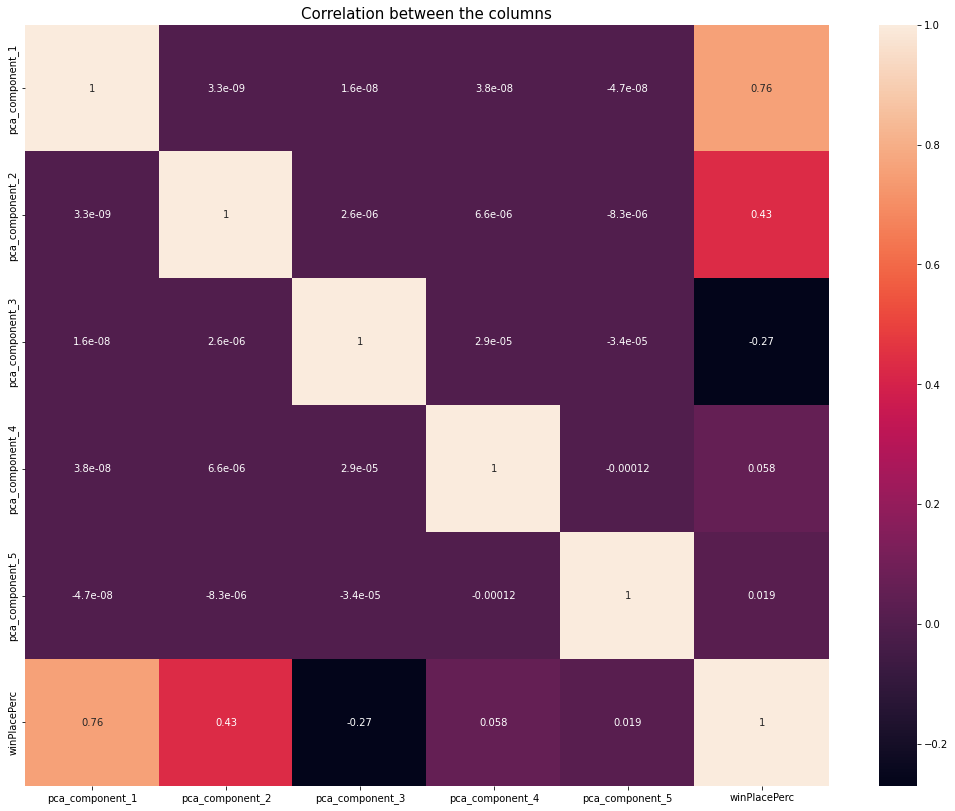

In [ ]:
plt.figure(figsize=(18,14))
sns.heatmap(df_pca.corr(), annot=True)
plt.title('Correlation between the columns', fontsize = 15)
plt.show()

In [ ]:
df_pca.to_csv("/content/drive/MyDrive/pca_data.csv")

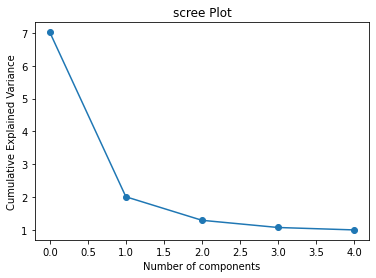

In [ ]:
plt.title('scree Plot')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_,'o-')